## 列联表系列

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# crosstab
pd.crosstab(index,   #  分组依据
            columns,   # 列
            values=None,   # 聚合计算的值
            rownames=None,   # 列名称
            colnames=None,   # 行名称
            aggfunc=None,   # 聚合函数
            margins=False,   # 总计行/列
            dropna=True,   #  是否删除缺失值
            normalize=False    # 
           )

In [5]:
data=pd.read_stata("/Users/chenxiaomeng/Desktop/lll/3.14.dta")
data.head()

,grade,treat,takeup,rank,income,id,S1,q1,q2,q3,...,sexp_pay,merge1,class,_merge,treatment1,treatment2,treatment3,motivation,aclass,p
0,1.0,1,0.0,1,1,100.0,任缘儿,1.0,1,1,...,4,matched (3),8.0,matched (3),1,0,0,19.0,18,0.555355
1,1.0,1,0.0,1,1,48.0,张云露,1.0,2,2,...,5,matched (3),8.0,matched (3),1,0,0,21.0,18,0.555355
2,1.0,1,0.0,1,2,332.0,孙小焱,2.0,2,2,...,3,matched (3),5.0,matched (3),1,0,0,17.0,15,0.555355
3,1.0,1,0.0,1,2,391.0,佘剑远,2.0,1,2,...,3,matched (3),2.0,matched (3),1,0,0,17.0,12,0.555355
4,1.0,1,0.0,1,2,273.0,吴新阳,2.0,2,3,...,2,matched (3),4.0,matched (3),1,0,0,21.0,14,0.555355


<font color=#FF69B4>pd.crosstab(x, y) 数据显示频数</font>

In [18]:
pd.crosstab(data.iloc[:,0], data['aclass']) ##iloc提取了第一列

aclass,1.,11,110,111,112,113,114,115,116,12,...,211,212,22,23,24,25,26,27,28,29
grade,,,,,,,,,,,,,,,,,,,,,
1.0,1,47,28,1,49,3,48,49,37,41,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,57,32,25,33,58,45,38,33,42,8


In [19]:
pd.crosstab(data['grade'], data['aclass']) 

aclass,1.,11,110,111,112,113,114,115,116,12,...,211,212,22,23,24,25,26,27,28,29
grade,,,,,,,,,,,,,,,,,,,,,
1.0,1,47,28,1,49,3,48,49,37,41,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,57,32,25,33,58,45,38,33,42,8


<font color=#FF69B4>pd.crosstab(df.Sex, df.Handedness, margins = True)显示边缘分布</font>

In [10]:
pd.crosstab(data['grade'], data['aclass'],margins=True) 

aclass,1.,11,110,111,112,113,114,115,116,12,...,212,22,23,24,25,26,27,28,29,All
grade,,,,,,,,,,,,,,,,,,,,,
1.0,1,47,28,1,49,3,48,49,37,41,...,0,0,0,0,0,0,0,0,0,604
2.0,0,0,0,0,0,0,0,0,0,0,...,32,25,33,58,45,38,33,42,8,451
All,1,47,28,1,49,3,48,49,37,41,...,32,25,33,58,45,38,33,42,8,1055


In [ ]:
pd.crosstab(df.Sex, [df.Handedness, df.Nationality], margins = True)

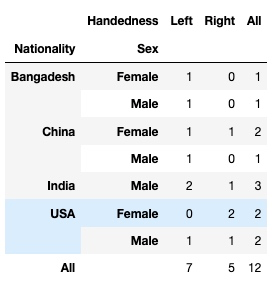

In [11]:
pd.crosstab([df.Nationality, df.Sex], df.Handedness, margins = True)

NameError: name 'df' is not defined

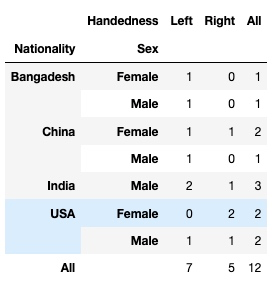

In [ ]:
##求百分比
pd.crosstab(df.Sex, df.Handedness, normalize='index')

In [ ]:
##求age的平均值
import numpy as np
pd.crosstab(df.Sex, df.Handedness, values=df.Age, aggfunc=np.average)

In [7]:
pd.crosstab(index=data['grade'],
            columns=data['aclass'],
            values=data['motivation'],
            aggfunc='sum',
            margins=True
           ).round(0).fillna(0).astype('int')

aclass,1.,11,110,111,112,113,114,115,116,12,...,212,22,23,24,25,26,27,28,29,All
grade,,,,,,,,,,,,,,,,,,,,,
1.0,17,879,491,20,960,48,903,974,717,727,...,0,0,0,0,0,0,0,0,0,11334
2.0,0,0,0,0,0,0,0,0,0,0,...,563,461,604,1143,920,713,602,793,146,8435
All,17,879,491,20,960,48,903,974,717,727,...,563,461,604,1143,920,713,602,793,146,19769


## crosstab的一个完整示例
https://blog.csdn.net/fendouaini/article/details/109126352

In [ ]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

# 启用多单元输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [13]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
pd.crosstab(index=diamonds['cut'], columns=diamonds['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [18]:
pd.crosstab(index=diamonds['cut'],
            columns=diamonds['color'],
            values=diamonds['price'],
            aggfunc=np.mean).round(1)  ##round后是小数点位数
##输出结果是平均价格

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.1,2597.6,3374.9,3720.7,3889.3,4452.0,4918.2
Premium,3631.3,3538.9,4324.9,4500.7,5216.7,5946.2,6294.6
Very Good,3470.5,3214.7,3778.8,3872.8,4535.4,5255.9,5103.5
Good,3405.4,3423.6,3495.8,4123.5,4276.3,5078.5,4574.2
Fair,4291.1,3682.3,3827.0,4239.3,5135.7,4685.4,4975.7


<AxesSubplot:xlabel='color', ylabel='cut'>

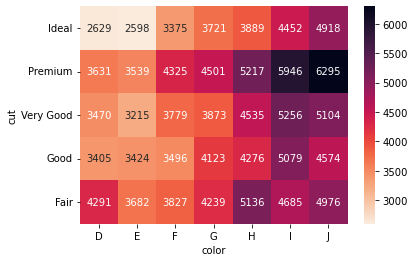

In [19]:
cross = pd.crosstab(index=diamonds['cut'],
                    columns=diamonds['color'],
                    values=diamonds['price'],
                    aggfunc=np.mean).round(0)
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g')
##fmt='g'让数字显示为整数，不要科学计数

In [20]:
##将热力图*列联表的操作定义为一个函数
def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.show();

### 改表格提头——rename

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_tips = sns.load_dataset('tips')

In [3]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
pd.crosstab(index=df_tips['day'], columns=df_tips['sex'])

sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [9]:
pd.crosstab(index=df_tips['day'], columns=df_tips['sex'], colnames=['gender']).rename(columns={"Male": "boy", "Female": "girl"})



gender,boy,girl
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [10]:
len(df_tips.query("sex=='Male' and day=='Thur'"))

30

In [11]:
pd.crosstab(index=df_tips['day'], columns=df_tips['sex'], colnames=['gender']).unstack().reset_index().rename(columns={0: "count_meals_served"})



,gender,day,count_meals_served
0,Male,Thur,30
1,Male,Fri,10
2,Male,Sat,59
3,Male,Sun,58
4,Female,Thur,32
5,Female,Fri,9
6,Female,Sat,28
7,Female,Sun,18


In [22]:
pd.crosstab(index=df_tips['day'], columns=df_tips['sex'], colnames=['gender'], margins=True, margins_name="proportion_meals_served", normalize='index').rename(columns={"Male": "by_males", "Female": "by_females"})






gender,by_males,by_females
day,,
Thur,0.483871,0.516129
Fri,0.526316,0.473684
Sat,0.678161,0.321839
Sun,0.763158,0.236842
proportion_meals_served,0.643443,0.356557


In [24]:
df_tips.query("sex=='Male' and day=='Thur'")['total_bill'].head()

77    27.20
78    22.76
79    17.29
80    19.44
81    16.66
Name: total_bill, dtype: float64

In [25]:
df_tips.query("sex=='Male' and day=='Thur'")['total_bill'].mean()

18.714666666666666

## 表格内数字显示第三个变量的描述性统计

In [26]:
pd.crosstab(index=df_tips['day'], columns=df_tips['sex'], values=df_tips['total_bill'], colnames=['gender'], aggfunc='mean').rename(columns={"Male": "mean_bill_size_meals_served_by_males", "Female": "mean_bill_size_meals_served_by_females"})



gender,mean_bill_size_meals_served_by_males,mean_bill_size_meals_served_by_females
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


## Pandas crosstab()与pivot_table()和groupby()的比较

In [21]:
diamonds.groupby(['cut', 'color'])['price'].mean().round(0)

cut        color
Ideal      D        2629.0
           E        2598.0
           F        3375.0
           G        3721.0
           H        3889.0
           I        4452.0
           J        4918.0
Premium    D        3631.0
           E        3539.0
           F        4325.0
           G        4501.0
           H        5217.0
           I        5946.0
           J        6295.0
Very Good  D        3470.0
           E        3215.0
           F        3779.0
           G        3873.0
           H        4535.0
           I        5256.0
           J        5104.0
Good       D        3405.0
           E        3424.0
           F        3496.0
           G        4123.0
           H        4276.0
           I        5079.0
           J        4574.0
Fair       D        4291.0
           E        3682.0
           F        3827.0
           G        4239.0
           H        5136.0
           I        4685.0
           J        4976.0
Name: price, dtype: float64

In [24]:
grouped = diamonds.groupby(['cut', 'color'])['price'].mean().round(0)
grouped.unstack()  ##转化展示格式

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.0,2598.0,3375.0,3721.0,3889.0,4452.0,4918.0
Premium,3631.0,3539.0,4325.0,4501.0,5217.0,5946.0,6295.0
Very Good,3470.0,3215.0,3779.0,3873.0,4535.0,5256.0,5104.0
Good,3405.0,3424.0,3496.0,4123.0,4276.0,5079.0,4574.0
Fair,4291.0,3682.0,3827.0,4239.0,5136.0,4685.0,4976.0


In [22]:
diamonds.pivot_table(values='price',
                     index='cut',
                     columns='color',
                     aggfunc=np.mean).round(0)

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.0,2598.0,3375.0,3721.0,3889.0,4452.0,4918.0
Premium,3631.0,3539.0,4325.0,4501.0,5217.0,5946.0,6295.0
Very Good,3470.0,3215.0,3779.0,3873.0,4535.0,5256.0,5104.0
Good,3405.0,3424.0,3496.0,4123.0,4276.0,5079.0,4574.0
Fair,4291.0,3682.0,3827.0,4239.0,5136.0,4685.0,4976.0


In [25]:
pd.crosstab(index=diamonds['cut'],
            columns=diamonds['color'],
            values=diamonds['price'],
            aggfunc=np.mean).round(0)

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.0,2598.0,3375.0,3721.0,3889.0,4452.0,4918.0
Premium,3631.0,3539.0,4325.0,4501.0,5217.0,5946.0,6295.0
Very Good,3470.0,3215.0,3779.0,3873.0,4535.0,5256.0,5104.0
Good,3405.0,3424.0,3496.0,4123.0,4276.0,5079.0,4574.0
Fair,4291.0,3682.0,3827.0,4239.0,5136.0,4685.0,4976.0


### 1. groupby最快，用untack之后输出也好看
###  2. croddtab可以处理任何数据类型，pivot_table只对dataframe有效
###  3. crosstable有一个normalize参数，可选all/index（行）/columns，即输出数字为全部/行/列百分比

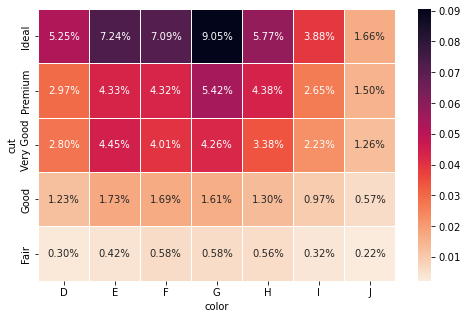

In [26]:
cross = pd.crosstab(index=diamonds['cut'],
                    columns=diamonds['color'],
                    normalize='all')
plot_heatmap(cross, fmt='.2%')

In [27]:
# 证明所有值加起来约等于1
pd.crosstab(diamonds['cut'], 
                diamonds['color'], 
                normalize='all').values.sum()

1.0000000000000002

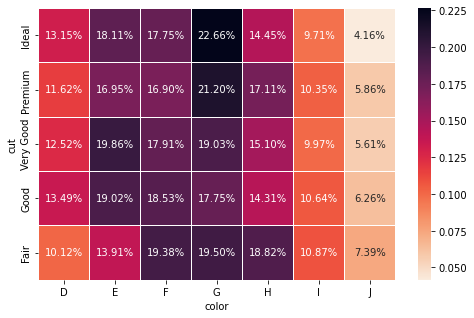

In [28]:
cross = pd.crosstab(diamonds['cut'], 
                    diamonds['color'], 
                    normalize='index')
plot_heatmap(cross, fmt='.2%')

In [29]:
## 证明每行加起来是1
pd.crosstab(diamonds['cut'], 
                diamonds['color'], 
                normalize='index').values.sum(axis=1)

array([1., 1., 1., 1., 1.])